<a href="https://colab.research.google.com/github/Ankit7281/faaca/blob/main/gudduji.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install deepface


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 3.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 49.4 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=bded9f82b6d10133d3c765ebf835ad7ce694aa0e441dfbad112327eb2bc1c0e2
  Stored in directory: /root/.cache/pip/wheels/46/54/24/1624fd5b8674eb1188623f7e8e17cdf7c0f6c24b609dfb8a89
Successfully built fire


In [3]:
from deepface import DeepFace
from PIL import Image, ImageDraw, ImageFont
import cv2

# Load test image
img_path = "/known_faces/ankitp001.jpeg"  # replace with your uploaded test image filename
img = cv2.imread(img_path)

# Analyze the image to find faces and identify known people
# Here, use "VGG-Face" model (default) for face recognition
result = DeepFace.find(img_path, db_path = "./known_faces")

print(result)

# If you want to verify one face against another (e.g., alice.jpg)
verification = DeepFace.verify("ankitp001.jpeg", "ankitp0011.jpeg")
print("Is it the same person?", verification["verified"])


ValueError: Passed path ./known_faces does not exist!

In [5]:
import os
os.makedirs("known_faces", exist_ok=True)


In [6]:
from deepface import DeepFace

img_path = "/root/ankitp001.png"  # path to your test image
result = DeepFace.find(img_path, db_path="./known_faces")
print(result)


25-05-17 16:57:40 - Found 1 newly added image(s), 0 removed image(s), 0 replaced image(s).


Finding representations:   0%|          | 0/1 [00:00<?, ?it/s]

25-05-17 16:57:43 - vgg_face_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/vgg_face_weights.h5
To: /root/.deepface/weights/vgg_face_weights.h5

  0%|          | 0.00/580M [00:00<?, ?B/s]
  2%|▏         | 11.0M/580M [00:00<00:05, 99.8MB/s]
  6%|▌         | 35.1M/580M [00:00<00:03, 179MB/s] 
 10%|█         | 58.2M/580M [00:00<00:02, 201MB/s]
 15%|█▍        | 84.4M/580M [00:00<00:02, 224MB/s]
 19%|█▉        | 110M/580M [00:00<00:02, 235MB/s] 
 23%|██▎       | 136M/580M [00:00<00:01, 243MB/s]
 28%|██▊       | 161M/580M [00:00<00:01, 243MB/s]
 32%|███▏      | 188M/580M [00:00<00:01, 249MB/s]
 37%|███▋      | 213M/580M [00:00<00:01, 241MB/s]
 41%|████▏     | 240M/580M [00:01<00:01, 249MB/s]
 46%|████▌     | 265M/580M [00:01<00:01, 240MB/s]
 51%|█████     | 293M/580M [00:01<00:01, 251MB/s]
 55%|█████▌    | 320M/580M [00:01<00:01, 255MB/s]
 60%|█████▉    | 346M/580M [00:01<00:00, 253MB/s]
 64%|██████▍   | 371M/580M [00:01<00:00, 245MB/s]
 69%|██████▊   | 398M/580M [00:01<00:00, 25

25-05-17 16:57:48 - There are now 1 representations in ds_model_vggface_detector_opencv_aligned_normalization_base_expand_0.pkl
25-05-17 16:57:48 - Searching /root/ankitp001.png in 1 length datastore
25-05-17 16:57:50 - find function duration 10.539865255355835 seconds
[                        identity                                      hash  \
0  ./known_faces/ankitp0011.jpeg  9fb5a0978b6645d526e064f1b5250853a11187db   

   target_x  target_y  target_w  target_h  source_x  source_y  source_w  \
0       115        96       206       206       117       199       203   

   source_h  threshold  distance  
0       203       0.68  0.009739  ]


In [7]:
import cv2
import matplotlib.pyplot as plt
from deepface import DeepFace
import os

# Paths
test_img_path = "/root/ankitp001.png"       # Your test image path
known_faces_path = "./known_faces"    # Folder with known images

# Run face recognition search
results = DeepFace.find(test_img_path, db_path=known_faces_path)

if results.empty:
    print("No matches found.")
else:
    # Pick best match (lowest distance)
    best_match = results.loc[results['distance'].idxmin()]
    matched_img_path = best_match['identity']
    distance = best_match['distance']
    threshold = best_match['threshold']

    print(f"Best match: {matched_img_path} with distance {distance:.4f}")

    # Load test image and draw label on it
    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)
    label = f"Matched: {os.path.basename(matched_img_path)}"

    # Put text on test image
    cv2.putText(test_img, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX,
                1, (255, 0, 0), 2, cv2.LINE_AA)

    # Load matched known face image
    matched_img = cv2.imread(matched_img_path)
    matched_img = cv2.cvtColor(matched_img, cv2.COLOR_BGR2RGB)

    # Plot images side by side
    plt.figure(figsize=(12,6))

    plt.subplot(1,2,1)
    plt.title("Test Image")
    plt.imshow(test_img)
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.title("Matched Known Face")
    plt.imshow(matched_img)
    plt.axis('off')

    plt.show()


25-05-17 17:02:55 - Searching /root/ankitp001.png in 1 length datastore
25-05-17 17:02:57 - find function duration 1.1982414722442627 seconds


AttributeError: 'list' object has no attribute 'empty'

25-05-17 17:16:05 - Searching /content/known_faces/ankitp0011.jpeg in 1 length datastore
25-05-17 17:16:06 - find function duration 0.9159564971923828 seconds
Best match: /content/known_faces/ankitp0011.jpeg with distance -0.0000


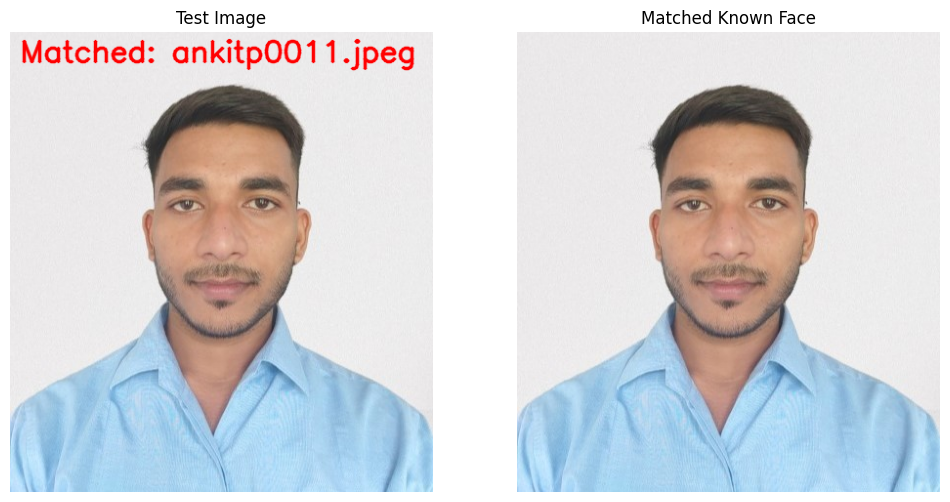

In [17]:
import cv2
import matplotlib.pyplot as plt
import os

# Paths (adjust if needed)
test_img_path = "/content/known_faces/ankitp0011.jpeg"        # your test image
known_faces_path = "/content/known_faces"     # known faces folder

# DeepFace find call
results = DeepFace.find(test_img_path, db_path=known_faces_path)

if not results or results[0].empty:
    print("No matches found.")
else:
    df = results[0]
    best_match = df.loc[df['distance'].idxmin()]
    matched_img_path = best_match['identity']
    distance = best_match['distance']

    print(f"Best match: {matched_img_path} with distance {distance:.4f}")

    # Load test image
    test_img = cv2.imread(test_img_path)
    test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2RGB)

    # Put label on test image
    label = f"Matched: {os.path.basename(matched_img_path)}"
    cv2.putText(test_img, label, (10, 30), cv2.FONT_HERSHEY_SIMPLEX,
                1, (255, 0, 0), 2, cv2.LINE_AA)

    # Load matched image
    matched_img = cv2.imread(matched_img_path)
    matched_img = cv2.cvtColor(matched_img, cv2.COLOR_BGR2RGB)

    # Display side by side
    plt.figure(figsize=(12, 6))

    plt.subplot(1, 2, 1)
    plt.title("Test Image")
    plt.imshow(test_img)
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.title("Matched Known Face")
    plt.imshow(matched_img)
    plt.axis('off')

    plt.show()
